In [1]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

# import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

import nltk as nl
# from nltk.tokenize import word_tokenize,wordpunct_tokenize
# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.corpus import words
# from nltk.corpus import stopwords
# from nltk.tokenize import RegexpTokenizer
# from scipy.signal import correlate

# Load and verify data

In [2]:
Evangiles = pickle.load(open("data/Evangiles.pkl", "rb"))
Mark = pickle.load(open("data/Mark.pkl", "rb"))
Matt = pickle.load(open("data/Matt.pkl", "rb"))
Luke = pickle.load(open("data/Luke.pkl", "rb"))
John = pickle.load(open("data/John.pkl", "rb"))

# Ev_verses = Evangiles.shape[0]
display(Evangiles.sample(5))

DM_Ev = pickle.load(open("distance_matrices/dist_mat_Ev.pkl", "rb"))
DM_Mc = pickle.load(open("distance_matrices/dist_mat_Mc.pkl", "rb"))
DM_Mt = pickle.load(open("distance_matrices/dist_mat_Mt.pkl", "rb"))
DM_Lc = pickle.load(open("distance_matrices/dist_mat_Lc.pkl", "rb"))
DM_Jn = pickle.load(open("distance_matrices/dist_mat_Jn.pkl", "rb"))

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
2321,Luke 12:15,εἶπεν δὲ πρὸς αὐτούς ὁρᾶτε καὶ φυλάσσεσθε ἀπὸ ...,"[εἶπεν, δὲ, πρὸς, αὐτούς, ὁρᾶτε, καὶ, φυλάσσεσ...","[λέγω, δέ, πρός, αὐτός, ὁράω, καί, φυλάσσω, ἀπ...","[εἶπεν, αὐτούς, ὁρᾶτε, φυλάσσεσθε, πάσης, πλεο...","[εἶπον, αὐτός, ὁράω, φυλάσσω, πλεονεξία, περισ...","[(εἶπον, αὐτός), (αὐτός, ὁράω), (ὁράω, φυλάσσω...","[(εἶπον, αὐτός, ὁράω), (αὐτός, ὁράω, φυλάσσω),...","[0.19183891672744488, 0.13133974401172097, 0.1...","[verb, adverb, adposition, pronoun, verb, coor...","[[(habitual, imperfective, iterative, perfecti...","[αὐτός, εἰμί, εἶπον, ζωὴ, περισσεύω, πλεονεξία..."
995,Matt 27:14,καὶ οὐκ ἀπεκρίθη αὐτῶι πρὸς οὐδὲ ἓν ῥῆμα ὥστε ...,"[καὶ, οὐκ, ἀπεκρίθη, αὐτῶι, πρὸς, οὐδὲ, ἓν, ῥῆ...","[καί, οὐ, ἀποκρίνω, αὐτῶι, πρός, οὐδέ, εἷς, ῥῆ...","[ἀπεκρίθη, αὐτῶι, ἓν, ῥῆμα, θαυμάζειν, ἡγεμόνα...","[ἀποκρίνω, ῥῆμα, θαυμάζω, ἡγεμών, λίαν]","[(ἀποκρίνω, ῥῆμα), (ῥῆμα, θαυμάζω), (θαυμάζω, ...","[(ἀποκρίνω, ῥῆμα, θαυμάζω), (ῥῆμα, θαυμάζω, ἡγ...","[0.4990871103142367, 0.5187198192667345, 0.413...","[coordinating_conjunction, adverb, verb, noun,...","[[], [(pos, neg)], [(habitual, imperfective, i...","[θαυμάζω, λίαν, ἀποκρίνω, ἡγεμών, ῥῆμα]"
3577,John 16:7,ἀλλ ἐγὼ τὴν ἀλήθειαν λέγω ὑμῖν συμφέρει ὑμῖν ἵ...,"[ἀλλ, ἐγὼ, τὴν, ἀλήθειαν, λέγω, ὑμῖν, συμφέρει...","[ἀλλ, ἐγώ, ὁ, ἀλήθεια, λέγω, ὑμεῖς, συμφέρω, ὑ...","[ἀλλ, ἀλήθειαν, λέγω, ὑμῖν, συμφέρει, ὑμῖν, ἵν...","[ἀλήθεια, λέγω, συμφέρω, ἀπέρχομαι, ἀπέρχομαι,...","[(ἀλήθεια, λέγω), (λέγω, συμφέρω), (συμφέρω, ἀ...","[(ἀλήθεια, λέγω, συμφέρω), (λέγω, συμφέρω, ἀπέ...","[0.09581712949226712, 0.13975251075560519, 0.1...","[adverb, pronoun, determiner, noun, verb, pron...","[[], [(nominative, accusative, ergative, absol...","[αὐτός, λέγω, πέμπω, παράκλητος, πορεύω, συμφέ..."
464,Matt 14:12,καὶ προσελθόντες οἱ μαθηταὶ αὐτοῦ ἦραν τὸ πτῶμ...,"[καὶ, προσελθόντες, οἱ, μαθηταὶ, αὐτοῦ, ἦραν, ...","[καί, προσέρχομαι, ὁ, μαθητής, αὐτός, ἀείρω, ὁ...","[προσελθόντες, μαθηταὶ, αὐτοῦ, ἦραν, πτῶμα, ἔθ...","[προσέρχομαι, μαθηταὶ, αὐτός, αἴρω, πτῶμα, θάπ...","[(προσέρχομαι, μαθηταὶ), (μαθηταὶ, αὐτός), (αὐ...","[(προσέρχομαι, μαθηταὶ, αὐτός), (μαθηταὶ, αὐτό...","[0.18433742603479297, 0.2102954228179564, 0.20...","[coordinating_conjunction, verb, determiner, n...","[[], [(habitual, imperfective, iterative, perf...","[αἴρω, αὐτός, θάπτω, μαθηταὶ, προσέρχομαι, πτῶ..."
3474,John 12:50,καὶ οἶδα ὅτι ἡ ἐντολὴ αὐτοῦ ζωὴ αἰώνιός ἐστιν ...,"[καὶ, οἶδα, ὅτι, ἡ, ἐντολὴ, αὐτοῦ, ζωὴ, αἰώνιό...","[καί, οἶδα, ὅτι, ὁ, ἐντολή, αὐτός, ζωή, αἰώνιο...","[οἶδα, ἐντολὴ, αὐτοῦ, ζωὴ, αἰώνιός, ἐστιν, λαλ...","[οἶδα, ἐντολὴ, αὐτός, ζωὴ, αἰώνιός, εἰμί, λαλέ...","[(οἶδα, ἐντολὴ), (ἐντολὴ, αὐτός), (αὐτός, ζωὴ)...","[(οἶδα, ἐντολὴ, αὐτός), (ἐντολὴ, αὐτός, ζωὴ), ...","[0.08289972521293304, 0.11351219944155336, 0.1...","[coordinating_conjunction, verb, subordinating...","[[], [(habitual, imperfective, iterative, perf...","[αἰώνιός, αὐτός, εἰμί, εἴρηκέν, ζωὴ, καθώς, λα..."


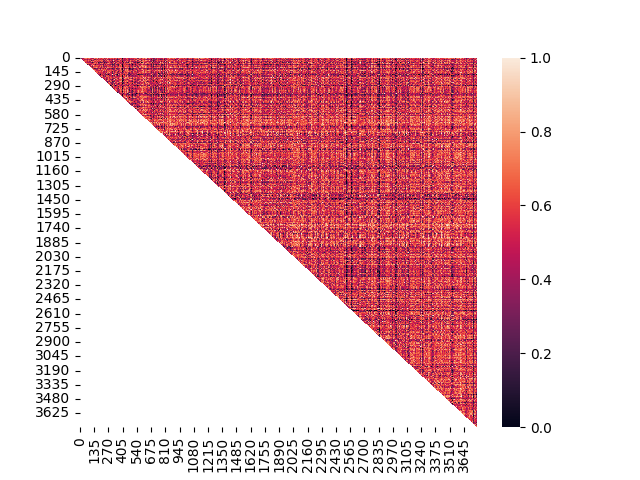

In [3]:
%matplotlib widget
plt.figure()
ax = sns.heatmap(DM_Ev[4], linewidth=0)
plt.show()

# Edit distance test on 2 verses

In [4]:
# Edit distance test on verses
id_verse_1 = "Luke 1:1"
id_verse_2 = "Matt 16:21"
# id_verse_2 = "Luke 1:2"

def extract_verse(id_verse,df):   
    extracted_verse = df[df.verses == id_verse].reset_index(drop=True)
    display(extracted_verse)
    return extracted_verse

# Find the verses in dataframes
v_1 = extract_verse(id_verse_1,Evangiles)
v_2 = extract_verse(id_verse_2,Evangiles)

def compute_distance(v_1,v_2,method,info=False,transpos=False):
    str_v1 = v_1[method][0]
    len_v1 = len(str_v1)
    str_v2 = v_2[method][0]
    len_v2 = len(str_v2)
   
    # Compute edit distance (characters)
    if min(len_v1,len_v2) != 0 : edit_dist = (nl.edit_distance(str_v1, str_v2,transpositions=transpos)-abs(len_v1-len_v2))/min(len_v1,len_v2)*max(len_v1,len_v2)  # Normalized distance
    else : edit_dist = 1
    # edit_dist = (nl.edit_distance(str_v1, str_v2)-abs(len_v1-len_v2))/min(len_v1,len_v2)  # Raw distance (unity : words/characters)

    if info == True:
        print("\n-----",method," -----\n")
        print(str_v1)
        print(str_v2)
        print(f"Edit distance between 2 verses :",edit_dist)
    return edit_dist

compute_distance(v_1,v_2,'text',True)
compute_distance(v_1,v_2,'tokens',True,True)
compute_distance(v_1,v_2,'lemmata',True,True)
compute_distance(v_1,v_2,'tokens_filtered',True,True)
compute_distance(v_1,v_2,'lemmata_filtered',True,True)
compute_distance(v_1,v_2,'pos',True,True)
compute_distance(v_1,v_2,'vocabulary',True,True)

,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Luke 1:1,ἐπειδήπερ πολλοὶ ἐπεχείρησαν ἀνατάξασθαι διήγη...,"[ἐπειδήπερ, πολλοὶ, ἐπεχείρησαν, ἀνατάξασθαι, ...","[ἐπεί, πολύς, ἐπιχειρέω, ἀνατάσσομαι, διήγησις...","[ἐπειδήπερ, πολλοὶ, ἐπεχείρησαν, ἀνατάξασθαι, ...","[ἐπεί, πολύς, ἐπιχειρέω, ἀνατάσσω, διήγησις, π...","[(ἐπεί, πολύς), (πολύς, ἐπιχειρέω), (ἐπιχειρέω...","[(ἐπεί, πολύς, ἐπιχειρέω), (πολύς, ἐπιχειρέω, ...","[0.19774156923781327, 0.3964148446399262, 0.33...","[adverb, adjective, verb, verb, noun, adpositi...","[[], [(nominative, accusative, ergative, absol...","[διήγησις, πληροφορέω, πολύς, πρᾶγμα, ἀνατάσσω..."


,verses,text,tokens,lemmata,tokens_filtered,lemmata_filtered,bigrams,trigrams,lemmata_tfidf,pos,morpho,vocabulary
0,Matt 16:21,ἀπὸ τότε ἤρξατο ὁ ἰησοῦς δεικνύειν τοῖς μαθητα...,"[ἀπὸ, τότε, ἤρξατο, ὁ, ἰησοῦς, δεικνύειν, τοῖς...","[ἀπό, τότε, ἄρχω, ὁ, ἰησοῦς, δείκνυμι, ὁ, μαθη...","[τότε, ἤρξατο, ἰησοῦς, δεικνύειν, μαθηταῖς, αὐ...","[ἄρχω, ἰησοῦς, δείκνυμι, μαθητής, αὐτός, αὐτό...","[(ἄρχω, ἰησοῦς), (ἰησοῦς, δείκνυμι), (δείκνυ...","[(ἄρχω, ἰησοῦς, δείκνυμι), (ἰησοῦς, δείκνυμι...","[0.14396087868054722, 0.1642331375813832, 0.19...","[adposition, adverb, verb, determiner, noun, v...","[[], [], [(habitual, imperfective, iterative, ...","[αὐτός, γραμματεύς, δείκνυμι, μαθητής, πάσχω, ..."



----- text  -----

ἐπειδήπερ πολλοὶ ἐπεχείρησαν ἀνατάξασθαι διήγησιν περὶ τῶν πεπληροφορημένων ἐν ἡμῖν πραγμάτων
ἀπὸ τότε ἤρξατο ὁ ἰησοῦς δεικνύειν τοῖς μαθηταῖς αὐτοῦ ὅτι δεῖ αὐτὸν εἰς ἱεροσόλυμα ἀπελθεῖν καὶ πολλὰ παθεῖν ἀπὸ τῶν πρεσβυτέρων καὶ ἀρχιερέων καὶ γραμματέων καὶ ἀποκτανθῆναι καὶ τῆι τρίτηι ἡμέραι ἐγερθῆναι
Edit distance between 2 verses : 120.19354838709678

----- tokens  -----

['ἐπειδήπερ', 'πολλοὶ', 'ἐπεχείρησαν', 'ἀνατάξασθαι', 'διήγησιν', 'περὶ', 'τῶν', 'πεπληροφορημένων', 'ἐν', 'ἡμῖν', 'πραγμάτων']
['ἀπὸ', 'τότε', 'ἤρξατο', 'ὁ', 'ἰησοῦς', 'δεικνύειν', 'τοῖς', 'μαθηταῖς', 'αὐτοῦ', 'ὅτι', 'δεῖ', 'αὐτὸν', 'εἰς', 'ἱεροσόλυμα', 'ἀπελθεῖν', 'καὶ', 'πολλὰ', 'παθεῖν', 'ἀπὸ', 'τῶν', 'πρεσβυτέρων', 'καὶ', 'ἀρχιερέων', 'καὶ', 'γραμματέων', 'καὶ', 'ἀποκτανθῆναι', 'καὶ', 'τῆι', 'τρίτηι', 'ἡμέραι', 'ἐγερθῆναι']
Edit distance between 2 verses : 29.09090909090909

----- lemmata  -----

['ἐπεί', 'πολύς', 'ἐπιχειρέω', 'ἀνατάσσομαι', 'διήγησις', 'περί', 'ὁ', 'πληροφορέω', 'ἐν', 'ἡμεῖς

13.714285714285714

# Intertextuality detection

### Detection areas within distance matrix

Mt_lim = [0,1068,0,1068]

Mc_lim = [1068,1741,1068,1741]

Lc_lim = [1741,2890,1741,2890]

Jn_lim = [2890,3768,2890,3768]

Mt_Mc_lim = [0,1068,1068,1741]

Mt_Lc_lim = [0,1068,1741,2890]

Mt_Jn_lim = [0,1068,2890,3768]

Mc_Lc_lim = [1068,1741,1741,2890]

Mc_Jn_lim = [1068,1741,2890,3768]

Lc_Jn_lim = [1741,2890,2890,3768]


In [5]:
Mt_lim = [0,1068,0,1068]
Mc_lim = [1068,1741,1068,1741]
Lc_lim = [1741,2890,1741,2890]
Jn_lim = [2890,3768,2890,3768]
Mt_Mc_lim = [0,1068,1068,1741]
Mt_Lc_lim = [0,1068,1741,2890]
Mt_Jn_lim = [0,1068,2890,3768]
Mc_Lc_lim = [1068,1741,1741,2890]
Mc_Jn_lim = [1068,1741,2890,3768]
Lc_Jn_lim = [1741,2890,2890,3768]

def intertext(DM,thr,df,method,limits=[],info=False):

    if method=='all':
        M = (DM[0]+DM[1]+DM[2]+DM[3]+DM[4]+DM[5])/6
    else : 
        order = ['tokens','lemmata','lemmata_filtered','vocabulary','pos']
        id_M = order.index(method)
        M = DM[id_M]
        
    if limits != [] : M = M[limits[0]:limits[1],limits[2]:limits[3]]
    else : M,limits = M,[0,0,0,0]
    coords = np.where(M<=thr)
    
    parallels = pd.DataFrame() 
    parallels['method'] = [method for i in range(len(coords[0]))]
    parallels['value'] = [0.0 for i in range(len(coords[0]))]
    parallels['verse_1'] = [' ' for i in range(len(coords[0]))]
    parallels['verse_2'] = [' ' for i in range(len(coords[0]))]
    parallels['id_1'] = [0 for i in range(len(coords[0]))]
    parallels['id_2'] = [0 for i in range(len(coords[0]))]
    
    for i in range(len(coords[0])):
        parallels.loc[i, 'value'] = M[coords[0][i],coords[1][i]]
        parallels.loc[i, 'verse_1'] = df['verses'][coords[0][i]+limits[0]]
        parallels.loc[i, 'verse_2'] = df['verses'][coords[1][i]+limits[2]]
        parallels.loc[i, 'id_1'] = coords[0][i]+limits[0]
        parallels.loc[i, 'id_2'] = coords[1][i]+limits[2]
        if info == True :
            print("\n----------  Similarity : ",parallels['value'][i])
            print(parallels['verse_1'][i])
            print(parallels['verse_2'][i])
            print(str(df[method][parallels.id_1[i]]))
            print(str(df[method][parallels.id_2[i]]))

    return parallels

### Parallels features 

In [30]:
parallels = intertext(DM_Ev,0.3,Evangiles,'lemmata',limits=Mt_Mc_lim,info=False)
parallels['spatial_dist'] = parallels.id_2-parallels.id_1

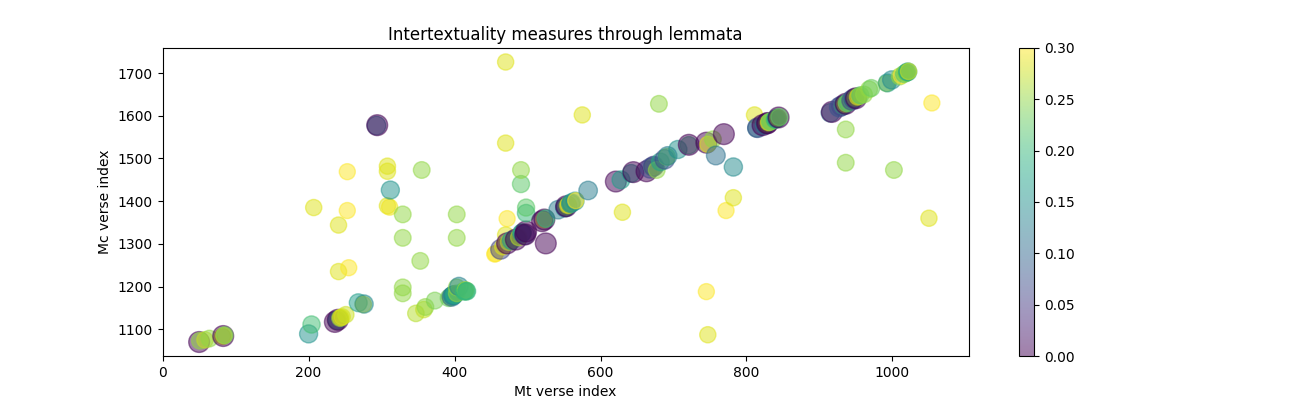

In [32]:
%matplotlib widget
plt.figure(figsize=(13, 4))
colors = parallels.value
plt.scatter(parallels.id_1,parallels.id_2,(15/(parallels.value+1))**2,c=colors,alpha=0.5)
# plt.plot(parallels.id_2,parallels.spatial_dist,'b.')
plt.title("Intertextuality measures through "+parallels.method[0])
plt.xlabel("Mt verse index")
plt.ylabel("Mc verse index")
plt.colorbar()
plt.show()

# colors = df.pos_clusters

# plt.figure(figsize=(15, 4))
# out = plt.scatter(df.index,verses_length,df.pos_clusters*5, c=colors, alpha=0.4)

# # plt.legend()
# # plt.ylim([20, 400])
# plt.show()

# Synoptics parallels detection

In [43]:
id1 = 82
id2 = 1083
print(Evangiles.verses[id1])
print(Evangiles.lemmata[id1])
print(Evangiles.text[id1])

print(Evangiles.verses[id2])
print(Evangiles.lemmata[id2])
print(Evangiles.text[id2])

Matt 4:18
['περιπατέω', 'δέ', 'παρά', 'ὁ', 'θάλασσα', 'ὁ', 'γαλιλαία', 'ὁράω', 'δύο', 'ἀδελφός', 'σίμων', 'ὁ', 'λέγω', 'πέτρος', 'καί', 'ἀνδρέας', 'ὁ', 'ἀδελφός', 'αὐτός', 'βάλλω', 'ἀμφίβληστρον', 'εἰς', 'ὁ', 'θάλασσα', 'εἰμί', 'γάρ', '̔αλιεύς']
περιπατῶν δὲ παρὰ τὴν θάλασσαν τῆς γαλιλαίας εἶδεν δύο ἀδελφούς σίμωνα τὸν λεγόμενον πέτρον καὶ ἀνδρέαν τὸν ἀδελφὸν αὐτοῦ βάλλοντας ἀμφίβληστρον εἰς τὴν θάλασσαν ἦσαν γὰρ ἁλιεῖς
Mark 1:16
['καί', 'παράγω', 'παρά', 'ὁ', 'θάλασσα', 'ὁ', 'γαλιλαία', 'ὁράω', 'σίμων', 'καί', 'ἀνδρέας', 'ὁ', 'ἀδελφός', 'σίμων', 'βάλλω', 'ἐν', 'τῆι', 'θαλάσσηι', 'εἰμί', 'γάρ', '̔αλιεύς']
καὶ παράγων παρὰ τὴν θάλασσαν τῆς γαλιλαίας εἶδεν σίμωνα καὶ ἀνδρέαν τὸν ἀδελφὸν σίμωνος ἀμφιβάλλοντας ἐν τῆι θαλάσσηι ἦσαν γὰρ ἁλιεῖς


## Closest parallels to a chosen verse

In [38]:
verse = "Mark 8:31"
# verse = "Mark 9:31"
# verse = "Matt 14:15"
# verse = 33

def parallels(verse,DM,method="all",df=None):
   
    if method=='all':
        M = np.multiply(DM[2],DM[4])
    else : 
        order = ['tokens','lemmata','lemmata_filtered','vocabulary','pos']
        id_M = order.index(method)
        M = DM[id_M]
    
    length = df.shape[0]
    
    # Find verse id
    if type(verse) != int:
        verse_id = df.loc[df["verses"]==verse].index[0]
        verse_name = verse
    else: 
        verse_name = df.verses[verse]
        verse_id = verse

    M = np.triu(M, k=1)+np.triu(M, k=1).T
    
    distances = M[verse_id,:]
    
    parallels = pd.DataFrame()
    parallels['method'] = [method for i in range(length)]
    parallels['value'] = [d for d in distances]
    parallels['verse_1'] = [verse_name for i in range(length)]
    parallels['verse_2'] = [v for v in df.verses]
    parallels['id_1'] = [verse_id for i in range(length)]
    parallels['id_2'] = [i for i in range(length)]

    return parallels.sort_values('value').reset_index(drop=True)
    

L = parallels(verse,DM_Ev,df=Evangiles,method='lemmata_filtered')
L = L.drop(0).reset_index(drop=True)
display(L.head(8))

print(" ==== Target verse ====")
print(Evangiles.text[L.id_1[0]])
print(Evangiles.lemmata_filtered[L.id_1[0]])

for i,idx in enumerate(L.id_2[0:10]):
    print("\n---------------- Parallel",i+1)
    print("Verse : ",Evangiles.verses[idx])
    print("Distance : ",L.value[i+1])
    print("Text : ",Evangiles.text[idx])
    print("Lemmata filtered : ",Evangiles.lemmata_filtered[idx])
    print("Mean TF-IDF : ",np.mean(Evangiles.lemmata_tfidf[idx]))
    

,method,value,verse_1,verse_2,id_1,id_2
0,lemmata_filtered,0.230769,Mark 8:31,Luke 9:22,1382,2170
1,lemmata_filtered,0.333333,Mark 8:31,Luke 17:25,1382,2523
2,lemmata_filtered,0.466667,Mark 8:31,Matt 16:21,1382,548
3,lemmata_filtered,0.500000,Mark 8:31,John 12:10,1382,3434
4,lemmata_filtered,0.500000,Mark 8:31,Mark 15:3,1382,1677
5,lemmata_filtered,0.500000,Mark 8:31,Mark 10:34,1382,1471
6,lemmata_filtered,0.571429,Mark 8:31,Matt 7:29,1382,200
7,lemmata_filtered,0.600000,Mark 8:31,John 8:30,1382,3255


 ==== Target verse ====
καὶ ἤρξατο διδάσκειν αὐτοὺς ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ὑπὸ τῶν πρεσβυτέρων καὶ τῶν ἀρχιερέων καὶ τῶν γραμματέων καὶ ἀποκτανθῆναι καὶ μετὰ τρεῖς ἡμέρας ἀναστῆναι
['ἄρχω', 'διδάσκω', 'αὐτός', 'υἱός', 'ἄνθρωπος', 'πολύς', 'πάσχω', 'ἀποδοκιμάζω', 'πρέσβυς', 'ἀρχιερεύς', 'γραμματεύς', 'ἀποκτείνω', 'τρεῖς', 'ἡμέρα', 'ἀνίστημι']

---------------- Parallel 1
Verse :  Luke 9:22
Distance :  0.3333333333333333
Text :  εἰπὼν ὅτι δεῖ τὸν υἱὸν τοῦ ἀνθρώπου πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ἀπὸ τῶν πρεσβυτέρων καὶ ἀρχιερέων καὶ γραμματέων καὶ ἀποκτανθῆναι καὶ τῆι τρίτηι ἡμέραι ἐγερθῆναι
Lemmata filtered :  ['εἶπον', 'υἱός', 'ἄνθρωπος', 'πολύς', 'πάσχω', 'ἀποδοκιμάζω', 'πρέσβυς', 'ἀρχιερεύς', 'γραμματεύς', 'ἀποκτείνω', 'τρίτος', 'ἡμέρα', 'ἐγείρω']
Mean TF-IDF :  0.26891453400025017

---------------- Parallel 2
Verse :  Luke 17:25
Distance :  0.4666666666666667
Text :  πρῶτον δὲ δεῖ αὐτὸν πολλὰ παθεῖν καὶ ἀποδοκιμασθῆναι ἀπὸ τῆς γενεᾶς ταύτης
L